<a href="https://colab.research.google.com/github/Axebaevv/Week-4-Collaboratory/blob/main/week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SQLite Pandas Examples

Integrate SQLite with Pandas

In [8]:
df.to_sql('USER_SKILL', con)

**Using SQLite as a Time Series Database**
SQLite supports five *date* and *time* functions as follows:


1.   date(timestring, modifier, modifier, ...)
2.   time(timestring, modifier, modifier, ...)
3. datetime(timestring, modifier, modifier, ...)
4. julianday(timestring, modifier, modifier, ...)
5. strftime(format, timestring, modifier, modifier, ...)

All five date and time functions take a time string as an argument. The time string is followed by zero or more modifiers. The strftime() function also takes a format string as its first argument. With these date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

In this subsection, we will create a table to save man-made temperature data at different dates and times. You can presume that they are collected from some kind of temperature sensors.

This subsection notebook will present:



*   Practice date and time functions
*   Create a temperature table and index
*   Insert data into the temperature table
*   Query







In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

1. **Connect to database**

---


It was mentioned before the demo.db3 is extracted from a hydrological modelling. As a result, the data in each table is tidy and complete without NULL values. However, we can create a table with NULL values for demo.

In [14]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

2. **Play with date and time functions**

---


You can find more example from lang_datefunc or sqlite_date_time

**Compute the current date.**

In [28]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-24


**Compute the last day of the current month.**

In [12]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


3. **Create a table of time series temperature**

---


3.1 Create table
only with two columns of timestamp and Temperature

In [15]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

3.2 **Create an index:** 
For efficient querying, we'll want to index the timestamp column.

In [16]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

3.3 **Insert data**: Make 500 rows of data and temperature ranges between 18 to 26.

In [17]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature); 

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

4. **Play with time series table**: 4.1 Simple Query

In [18]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-12 07:40:59,21.24951729404666
2021-07-13 07:40:59,20.27768312794221
2021-07-14 07:40:59,20.707095647813432
2021-07-15 07:40:59,25.991750732340066
2021-07-16 07:40:59,25.625668060999747


4.2 Filter with a datetime

In [19]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-12 07:40:59.744979,21.24951729404666
2021-07-13 07:40:59.744979,20.27768312794221
2021-07-14 07:40:59.744979,20.707095647813432
2021-07-15 07:40:59.744979,25.991750732340066
2021-07-16 07:40:59.744979,25.625668060999747
2021-07-17 07:40:59.744979,18.704390825258155
2021-07-18 07:40:59.744979,25.35721438287939
2021-07-19 07:40:59.744979,20.777077003644315
2021-07-20 07:40:59.744979,20.04074908568858
2021-07-21 07:40:59.744979,23.436175777716507


4.3 Query data at a specific year
Use CAST string to integer as strftime returns a string.

In [20]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-12 07:40:59.744979,21.24951729404666
2021-07-13 07:40:59.744979,20.27768312794221
2021-07-14 07:40:59.744979,20.707095647813432
2021-07-15 07:40:59.744979,25.991750732340066
2021-07-16 07:40:59.744979,25.625668060999747
2021-07-17 07:40:59.744979,18.704390825258155
2021-07-18 07:40:59.744979,25.35721438287939
2021-07-19 07:40:59.744979,20.777077003644315
2021-07-20 07:40:59.744979,20.04074908568858
2021-07-21 07:40:59.744979,23.436175777716507


4.5 Aggregate yearly

In [21]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.13478100257186,25.99283474079061,18.004575661145346
2022,22.09287821834178,25.994123470234513,18.007250180934715


5. **Visualization**: Here we convert SQL query results into Pandas DataFrame.

In [22]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-12 07:40:59', '2021-07-13 07:40:59',
               '2021-07-14 07:40:59', '2021-07-15 07:40:59',
               '2021-07-16 07:40:59', '2021-07-17 07:40:59',
               '2021-07-18 07:40:59', '2021-07-19 07:40:59',
               '2021-07-20 07:40:59', '2021-07-21 07:40:59',
               ...
               '2022-11-14 07:40:59', '2022-11-15 07:40:59',
               '2022-11-16 07:40:59', '2022-11-17 07:40:59',
               '2022-11-18 07:40:59', '2022-11-19 07:40:59',
               '2022-11-20 07:40:59', '2022-11-21 07:40:59',
               '2022-11-22 07:40:59', '2022-11-23 07:40:59'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

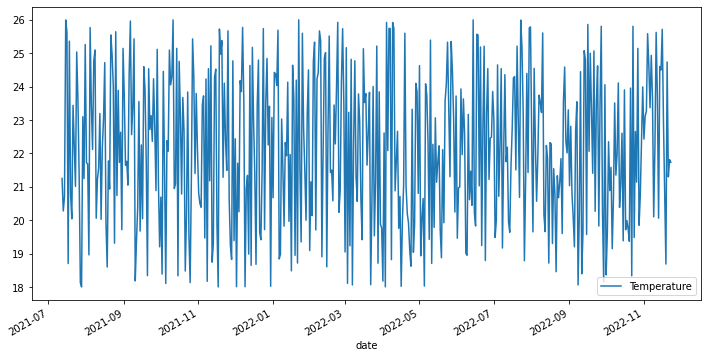

In [23]:
df.plot(figsize=(12, 6))

**Summary and References**

---


Time series databases (TSDBs) are getting popular these days. There are quite a few TSDbs such as InfluxDB, Graphite, Druid, Kairos, and Prometheus. With the SQLite date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

Ref: https://www.sqlite.org/lang_datefunc.html